# Bitcoin Forecast - ARMA & ARIMA

In [1]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

%matplotlib inline

import warnings; warnings.simplefilter('ignore')

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_bitcoin = pd.read_csv("../../assets/dataset/bitcoin.csv")
df_bitcoin['date_format'] = pd.to_datetime(df_bitcoin['date_format'])
df_bitcoin.set_index('date_format', inplace=True)
df_bitcoin.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
date_format,,,,,,,,
2013-04-28,bitcoin,"Apr 28, 2013",135.30,135.98,132.10,134.21,NaN,"1,500,520,000"
2013-04-29,bitcoin,"Apr 29, 2013",134.44,147.49,134.00,144.54,NaN,"1,491,160,000"
2013-04-30,bitcoin,"Apr 30, 2013",144.00,146.93,134.05,139.00,NaN,"1,597,780,000"
2013-05-01,bitcoin,"May 01, 2013",139.00,139.89,107.72,116.99,NaN,"1,542,820,000"
2013-05-02,bitcoin,"May 02, 2013",116.38,125.60,92.28,105.21,NaN,"1,292,190,000"


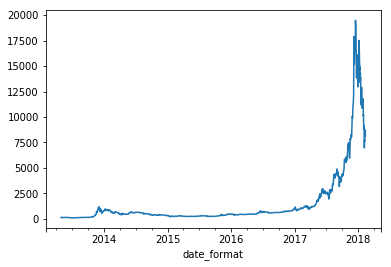

In [3]:
df_bitcoin['Close'].plot()

In [4]:
max(df_bitcoin.index)

Timestamp('2018-02-11 00:00:00')

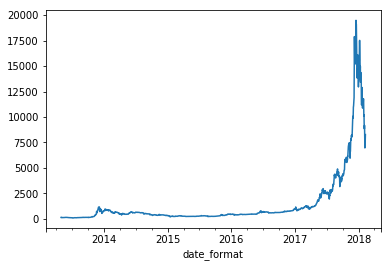

In [5]:
df_bitcoin_train = df_bitcoin.loc[:"2018-02-8",["Close"]]
df_bitcoin_test = df_bitcoin.loc["2018-02-9":,["Close"]]
df_bitcoin_train['Close'].plot()

In [6]:
df_bitcoin_train.tail()

,Close
date_format,
2018-02-04,8277.01
2018-02-05,6955.27
2018-02-06,7754.00
2018-02-07,7621.30
2018-02-08,8265.59


In [7]:
df_bitcoin_test

,Close
date_format,
2018-02-09,8736.98
2018-02-10,8621.90
2018-02-11,8129.97


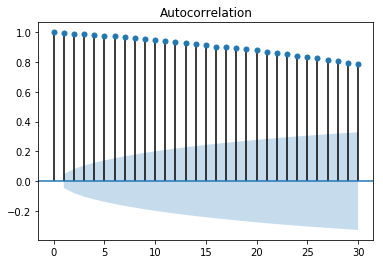

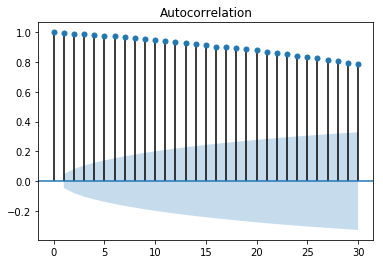

In [8]:
plot_acf(df_bitcoin_train, lags=30)

In [9]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 0, 0)).fit()

predictions = model.predict(
    '2018-02-09',
    '2018-02-11',
    dynamic=True, 
)

predictions

2018-02-09    8250.673815
2018-02-10    8235.790216
2018-02-11    8220.939132
Freq: D, dtype: float64

In [10]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test, predictions))
model.summary()

Mean absolute error:  321.12836731221824


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1748
Model:                     ARMA(1, 0)   Log Likelihood              -11952.202
Method:                       css-mle   S.D. of innovations            225.237
Date:                Mon, 21 May 2018   AIC                          23910.404
Time:                        22:47:49   BIC                          23926.803
Sample:                    04-28-2013   HQIC                         23916.466
                         - 02-08-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1437.8498   2127.083      0.676      0.499   -2731.157    5606.857
ar.L1.Close     0.9978      0.002    586.107      0.000       0.994       1.001
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0022           +0.0000j            1.0022            0.0000
-----------------------------------------------------------------------------
"""

In [11]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 0, 1)).fit()

predictions = model.predict(
    '2018-02-09',
    '2018-02-11',
    dynamic=True, 
)

predictions

2018-02-09    8333.221712
2018-02-10    8313.382310
2018-02-11    8293.599915
Freq: D, dtype: float64

In [12]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test, predictions))
model.summary()

Mean absolute error:  291.968630942825


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1748
Model:                     ARMA(1, 1)   Log Likelihood              -11940.339
Method:                       css-mle   S.D. of innovations            223.715
Date:                Mon, 21 May 2018   AIC                          23888.679
Time:                        22:47:49   BIC                          23910.543
Sample:                    04-28-2013   HQIC                         23896.762
                         - 02-08-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1428.8982   1854.452      0.771      0.441   -2205.761    5063.557
ar.L1.Close     0.9971      0.002    511.504      0.000       0.993       1.001
ma.L1.Close     0.1261      0.026      4.924      0.000       0.076       0.176
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0029           +0.0000j            1.0029            0.0000
MA.1           -7.9273           +0.0000j            7.9273            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
model = sm.tsa.ARIMA(df_bitcoin_train, (1, 1, 1)).fit()

predictions = model.predict(
    '2018-02-09',
    '2018-02-11',
    dynamic=False, 
    typ='levels'
)

predictions

2018-02-09    8487.918730
2018-02-10    8347.159003
2018-02-11    8449.201604
Freq: D, dtype: float64

In [14]:
print("Mean absolute error: ", mean_absolute_error(df_bitcoin_test, predictions))
model.summary()

Mean absolute error:  281.01129051707204


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1747
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11917.161
Method:                       css-mle   S.D. of innovations            221.969
Date:                Mon, 21 May 2018   AIC                          23842.322
Time:                        22:47:49   BIC                          23864.185
Sample:                    04-29-2013   HQIC                         23850.405
                         - 02-08-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.7429      5.727      0.828      0.408      -6.481      15.967
ar.L1.D.Close    -0.6687      0.052    -12.815      0.000      -0.771      -0.566
ma.L1.D.Close     0.7995      0.042     19.248      0.000       0.718       0.881
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4954           +0.0000j            1.4954            0.5000
MA.1           -1.2507           +0.0000j            1.2507            0.5000
-----------------------------------------------------------------------------
"""